# Project Overview: NYC Short-Term Rental Insights

Project Background

Pillow Palooza is a start-up focused on disrupting the traditional real estate market by offering short-term rental options for travelers. The company has seen a significant increase in demand for short-term rentals in New York City, but wants to better understand the market in order to optimize their business strategy.

Pillow Palooza has collected data from various sources on Airbnb listings in New York City to gain insight into the market. The company now plans to analyze this data using its internal teams, in order to provide recommendations on how to maximize revenue and occupancy rates for their short-term rental properties. 

* Samantha Patel, CEO: She will be interested in the insights gained from the project to determine which neighbourhoods and property types the company should invest in and how to price their rentals to remain competitive in the market.

* John Kim, VP of Data: He will be interested in the insights gained from the project to understand how data can be used to drive business decisions and to identify any trends or patterns that can inform future projects or analyses. John may also be interested in exploring machine learning or predictive modeling to forecast demand for short-term rentals in different neighborhoods.

* Emily Chen, Head of Marketing: She will be interested in the insights gained from the project to identify which neighborhoods and property types are most popular among potential guests and to develop targeted marketing campaigns to attract those guests.

* Michael Lee, Head of Finance: He will be interested in the insights gained from the project to identify which neighborhoods and property types generate the highest revenue and to determine how to price rentals to maximize profitability.

The main goal of the analysis is to gain insights into the short-term rental market in New York City and provide valuable information to assist Pillow Palooza, a start-up, in making informed business decisions. Through the analysis, we aim to uncover key trends in popular neighborhoods, rental prices, property types, length of stay, and demand over time. These insights will help Pillow Palooza identify promising neighborhoods for investment, determine the optimal property types to focus on, and establish competitive rental pricing strategies.

Table prices:
** listing_id = the listing ID
** price = The price for one night, in dollar
** borough = Name of the borough
** neighborhood = Name of the neighborhood
** price_per_mont = price per month in dollars
** latitude = latitude coordinates
** longitude = longitude coordidantes

Table reviews:
** listing_id = the listing ID
** host_name = name of the host
** minimum_nights = Minimum amount of nights to book the place
** last_review = date of the last review
** number_of_reviews = number of reviews
** reviews_per_month = number of reviews per month
** calculated_host_listings_count = amount of listing per host
** availability_365 = number of days when listing is available for booking in the next 365 days
** booked_days_365 = Amount of booked days in the next 365 days

Table room_types:
** listing_id = the listing ID
** description = the description of the listing
** room_type = listing space type


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data doawload from https://bit.io/emiliano/DA202_Airbnb_NYC?tab=Data
df1 = pd.read_csv('reviews.csv', index_col='listing_id')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df2 = pd.read_csv('room_types.csv', index_col='listing_id')
df2.drop('Unnamed: 0', axis=1, inplace=True)
df3 = pd.read_csv('prices.csv', index_col='listing_id')
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
nyc = df1.merge(df2, on='listing_id', how='inner').merge(df3, on='listing_id', how='inner')
nyc.head()

,host_name,last_review,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,description,room_type,price,borough,neighbourhood,price_per_month,latitude,longitude
listing_id,,,,,,,,,,,,,,,,
2595,Jennifer,2019-05-21 00:00:00,1,45,0.38,2,355,10,Skylit Midtown Castle,entire home/apt,225,Manhattan,Midtown,6843.750000,40.75362,-73.98377
3831,LisaRoxanne,2019-07-05 00:00:00,1,270,4.64,1,194,171,Cozy Entire Floor of Brownstone,entire home/apt,89,Brooklyn,Clinton Hill,2707.083333,40.68514,-73.95976
5099,Chris,2019-06-22 00:00:00,3,74,0.59,1,129,236,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,Manhattan,Murray Hill,6083.333333,40.74767,-73.97500
5178,Shunichi,2019-06-24 00:00:00,2,430,3.47,1,220,145,Large Furnished Room Near B'way,private room,79,Manhattan,Hell's Kitchen,2402.916667,40.76489,-73.98493
5238,Ben,2019-06-09 00:00:00,1,160,1.33,4,188,177,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,Manhattan,Chinatown,4562.500000,40.71344,-73.99037


In [4]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25202 entries, 2595 to 36455809
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       25194 non-null  object 
 1   last_review                     25202 non-null  object 
 2   minimum_nights                  25202 non-null  int64  
 3   number_of_reviews               25202 non-null  int64  
 4   reviews_per_month               25202 non-null  float64
 5   calculated_host_listings_count  25202 non-null  int64  
 6   availability_365                25202 non-null  int64  
 7   booked_days_365                 25202 non-null  int64  
 8   description                     25192 non-null  object 
 9   room_type                       25202 non-null  object 
 10  price                           25202 non-null  int64  
 11  borough                         25202 non-null  object 
 12  neighbourhood             

In [5]:
nyc.columns

Index(['host_name', 'last_review', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'booked_days_365', 'description', 'room_type',
       'price', 'borough', 'neighbourhood', 'price_per_month', 'latitude',
       'longitude'],
      dtype='object')

# DATA VALIDATION

Data consists of 25202 rows and 16 columns. The 'reviews' and 'room_types' tables have 25209 rows, while the 'price' table has 25202 rows. To merge the tables and eliminate null values, an inner join was performed, and the index = 'listing_id' present in all tables.

Listing_id = index, no duplicates values, no missing values
host_name = 8 missing values, replaced with 'unknown'
last_review = no missing values, converted data type from str to datetime
minimum_nights = no missing values
number_of_reviews = no missing values, values between 1 and 629
reviews_per_month = no missing values, vales between 0.02 and 58.5
calculated_host_listings_count = no missing values, values between 1 and 327
availability_365 = no missing values
booked_days_365 = 25209 non-null  int64 
description = 10 missing values, replaced with 'uncertain'
room_type = no missing values, 3 categories entire 'home/apt', 'private room', 'shared room'
price = 7 missing values, replaced with '0'
borough = Five boroughs, as expected
neighbourhood = 216 unique values
price_per_month = no missing values
latitude = no missing values
longitude = no missing values

In [16]:
# INDEX ('listing_id')
# duplicate 
duplicated = nyc.index.duplicated()

# Counting the number of duplicated 
num_duplicates = sum(duplicated)

print("Number of duplicated listing_ids:", num_duplicates)
print(f"Total listing_ids: {nyc.index.nunique()}")

Number of duplicated listing_ids: 0
Total listing_ids: 25202


In [7]:
# Handle missing values
for i in nyc.columns:
  if nyc[i].isna().sum() != 0:
    print('null values in', i, 'column :', nyc[i].isna().sum() ) 

null values in host_name column : 8
null values in description column : 10


In [17]:
# missing values 'host_name' replace with 'unknown'
nyc['host_name'].fillna('unknown', inplace=True)

In [18]:
# column 'description' replace 10 missing values 'uncertain'
nyc['description'].fillna('uncertain', inplace=True)

In [9]:
# column 'last_review'
nyc['last_review'] = pd.to_datetime(nyc['last_review'])
print(nyc['last_review'].dtype)

datetime64[ns]


In [11]:
# column 'borough'
nyc['borough'].value_counts()

Brooklyn         10460
Manhattan        10322
Queens            3456
Bronx              697
Staten Island      267
Name: borough, dtype: int64

In [12]:
nyc['neighbourhood'].nunique()

216

# EDA
* Descriptive Analysis and Correlations

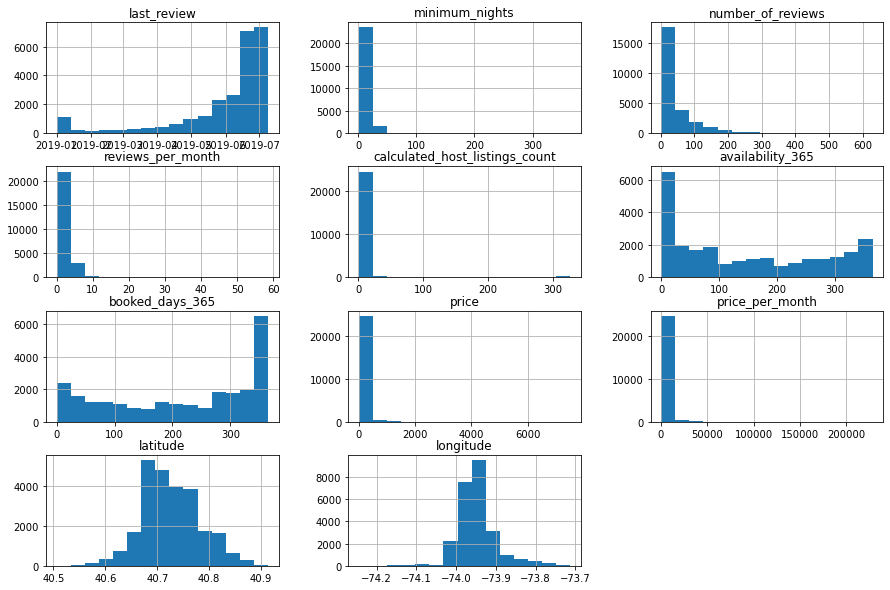

In [13]:
# distribution per variable
nyc.hist(bins=15, figsize=(15,10));


In [14]:
nyc[['minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 
     'availability_365', 'booked_days_365', 'price', 'price_per_month', 'latitude', 'longitude']].describe()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,booked_days_365,price,price_per_month,latitude,longitude
count,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000,25202.000000
mean,4.896715,40.210856,1.973993,6.147766,146.392747,218.607253,141.817316,4313.610031,40.727145,-73.947975
std,10.406988,55.319896,1.796687,31.359090,127.132444,127.132444,147.350650,4481.915598,0.056304,0.050951
min,1.000000,1.000000,0.020000,1.000000,0.000000,0.000000,10.000000,304.166667,40.506410,-74.244420
25%,1.000000,5.000000,0.650000,1.000000,22.000000,96.000000,69.000000,2098.750000,40.687400,-73.982608
50%,2.000000,18.000000,1.460000,1.000000,116.000000,249.000000,105.000000,3193.750000,40.721050,-73.953000
75%,4.000000,53.000000,2.840000,2.000000,269.000000,343.000000,175.000000,5322.916667,40.762577,-73.929733
max,365.000000,629.000000,58.500000,327.000000,365.000000,365.000000,7500.000000,228125.000000,40.913060,-73.712990


minimum_nights: The mean is approximately 4.9, which suggests that the average minimum nights required for rentals is around 4 to 5 nights. The standard deviation is relatively high (10.4), indicating a wide variation in minimum nights. The minimum value is 1 night, while the maximum value is 365 nights.

number_of_reviews: average of 40 reviews per listing. The standard deviation is relatively high (55.3), indicating a wide variation in the number of reviews. The minimum number of reviews is 1, while the maximum is 629.

reviews_per_month: The mean is approximately 1.97, suggesting an average of almost 2 reviews per month. The standard deviation is relatively high (1.8), indicating variation in the number of reviews per month. The minimum value is 0.02, and the maximum is 58.5.

calculated_host_listings_count: The mean is approximately 6.1, suggesting that, on average, hosts have around 6 listings. The standard deviation is relatively high (31.4), indicating a wide variation in the number of listings per host. The minimum and maximum values are 1 and 327, respectively.

availability_365: The mean is approximately 146.4, indicating that, on average, listings are available for approximately 146 days in a year. The standard deviation is relatively high (127.1), indicating variation in availability throughout the year. The minimum and maximum values are 0 and 365, respectively.

booked_days_365: The mean is approximately 218.6, suggesting that, on average, listings are booked for around 218 days in a year. The standard deviation is relatively high (127.1), indicating variation in the number of booked days. The minimum and maximum values are 0 and 365, respectively.

price: The mean price is approximately 141.8, indicating an average nightly rental price of around 141 dollar. The standard deviation is relatively high (147.4), indicating variation in rental prices. The minimum and maximum prices are 10 and 7500 dollars, respectively.

price_per_month: The mean is approximately 4313.6 dollar, indicating an average monthly rental price of around 4313.6 dollar. The standard deviation is relatively high (4481.9), suggesting variation in rental prices per month. The minimum and maximum values are 304.2 and 228125 dollars, respectively.

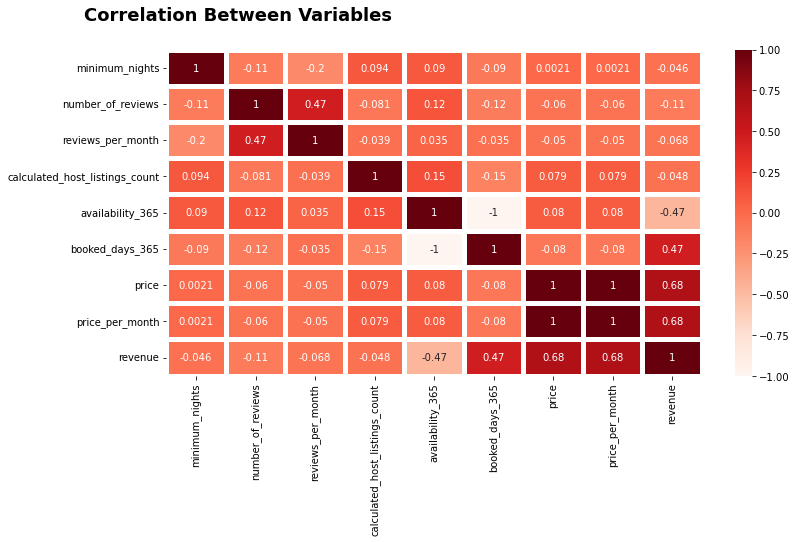

In [38]:
# Correlacion 
nyc_dropped = nyc.drop(['latitude', 'longitude'], axis=1)

plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(nyc_dropped.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', x=0.03, y=0.98, ha="left", fontsize='18', fontfamily='sans-serif', color="black")

plt.show()

# Analysis

### 1) What is the most common room type in NYC Airbnb listings?

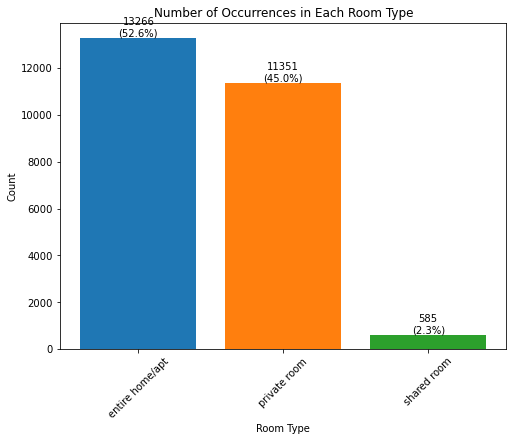

In [21]:
# column 'room_type'
room_type_number = nyc['room_type'].value_counts()
total_listings = room_type_number.sum()

# Calculate the percentage for each room type
percen = (room_type_number / total_listings) * 100

# Generate a color map with a unique color for each bar
colors = plt.cm.tab10(range(len(room_type_number)))

plt.figure(figsize=(8, 6))
plt.bar(room_type_number.index, room_type_number, color=colors)
plt.title('Number of Occurrences in Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add labels and percentages to the top of each bar
for i, count in enumerate(room_type_number):
    percentage = percen[i]
    plt.text(i, count, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

### 2) What is the average price of the listings by room type?

In [22]:
print(f"Average price for: {round(nyc.groupby('room_type')['price'].mean(), 2)}")

Average price for: room_type
entire home/apt    197.17
private room        81.67
shared room         53.65
Name: price, dtype: float64


### 3) Which borough has the highest average price per month? ANSWER = Manhattan 5596.69

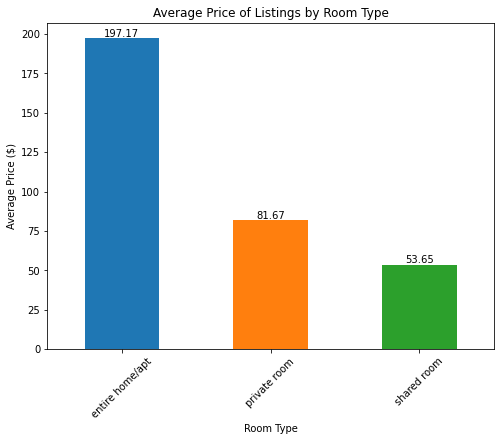

In [23]:
# print(f"Average price per month for each: {round(nyc.groupby('borough')['price_per_month'].mean().sort_values(ascending=False), 2)}")
avg_prices = nyc.groupby('room_type')['price'].mean()

# Generate a color map with a unique color for each bar
colors = plt.cm.tab10(range(len(avg_prices)))

plt.figure(figsize=(8, 6))
avg_prices.plot(kind='bar', color=colors)
plt.title('Average Price of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Add value labels to the top of each bar
for i, price in enumerate(avg_prices):
    plt.text(i, price, f'{price:.2f}', ha='center', va='bottom')

plt.show()

### 4) How many listings of each room type are in each borough?

In [24]:
# nyc.groupby(['borough', 'room_type']).size()
# Group the data by room type and borough, and count the number of listings
table = pd.crosstab(nyc['borough'], nyc['room_type'])

# Display the table
print(table)

room_type      entire home/apt  private room  shared room
borough                                                  
Bronx                      261           403           33
Brooklyn                  5367          4906          187
Manhattan                 6170          3901          251
Queens                    1335          2009          112
Staten Island              133           132            2


### 5) How many listings in each room type category have a price greater than $500 per night?

In [25]:
nyc.groupby('room_type')['price'].apply(lambda x: (x > 500).sum())

room_type
entire home/apt    395
private room        19
shared room          1
Name: price, dtype: int64

### 6) What is the distribution of listing prices by borough?

In [26]:
nyc.groupby('borough')['price'].agg(['min','max','mean'])

,min,max,mean
borough,,,
Bronx,20,670,79.241033
Brooklyn,10,7500,121.974665
Manhattan,10,5100,184.000678
Queens,10,2600,92.813947
Staten Island,13,300,86.044944


### 7) What is the estimated amount of revenue generated by hosts in each borough?

In [27]:
# revenue
nyc['revenue'] = nyc['price'] * nyc['booked_days_365']
estimated = nyc.groupby('borough')['revenue'].sum()
estimated.sort_values(ascending=False)

borough
Manhattan        393420567
Brooklyn         279130240
Queens            58404083
Bronx              9324180
Staten Island      3443919
Name: revenue, dtype: int64

### 8) What is the average price per month for listings in each neighbourhood? 

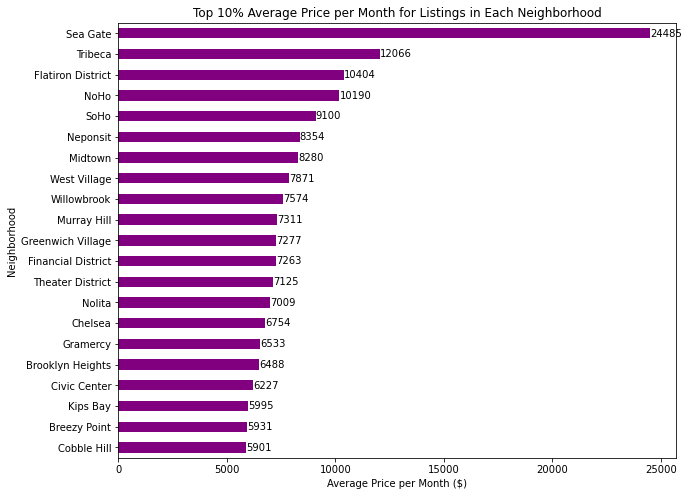

In [29]:
# nyc.groupby('neighbourhood')['price_per_month'].mean().sort_values(ascending=False)
avg_price_per_month = nyc.groupby('neighbourhood')['price_per_month'].mean().sort_values()

# Calculate the cutoff index for the top 50% of the data
cutoff_index = int(len(avg_price_per_month) * 0.1)

# Get the top 50% of the data
top_10_avg_price_per_month = avg_price_per_month.iloc[-cutoff_index:]

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
top_10_avg_price_per_month.plot(kind='barh', color='purple')

# Set the chart title and axis labels
plt.title('Top 10% Average Price per Month for Listings in Each Neighborhood')
plt.xlabel('Average Price per Month ($)')
plt.ylabel('Neighborhood')

# Add value labels to the right of each bar
for i, price in enumerate(top_10_avg_price_per_month):
    plt.text(price, i, f'{price:.0f}', ha='left', va='center')

# Show the plot
plt.show()

### 9) How many listings have no reviews? 

In [30]:
len(nyc[nyc['number_of_reviews'] == 0])

0

### 10) How do the estimated book days correlate with the price of an Airbnb listing in New York City?

The correlation coefficient ranges from -1 to 1, where -1 represents a strong negative correlation, 1 represents a strong positive correlation, and 0 represents no correlation. In this case, the correlation coefficient being close to 0 (-0.0796) suggests that there is little to no linear relationship between the price and the number of days booked in a year.

The negative sign of the correlation coefficient indicates that as the number of days booked in a year increases, the price tends to slightly decrease, although the correlation is weak. However, it's important to note that correlation does not imply causation, and other factors may influence the relationship between price and the number of days booked in a year.

In [31]:

# Calculate the correlation between price and booked_days_365
correlation = round(nyc['price'].corr(nyc['booked_days_365']), 4)

print("Correlation between price and book_days_365 in New York City:", correlation)

Correlation between price and book_days_365 in New York City: -0.0796


### 11) What is the average price per room type for listings that have at least 100 reviews and are available more than 200 days a year?

In [32]:
# filter
filt = nyc[(nyc['number_of_reviews'] >= 100) & (nyc['availability_365'] > 200)]
avg_ppr_type = filt.groupby('room_type')['price'].mean()
avg_ppr_type

room_type
entire home/apt    179.540163
private room        85.406149
shared room         59.190476
Name: price, dtype: float64

### 12) How many hosts have more than one listing, and what's the maximum number of listings by a single host name?

In [33]:
number = len(nyc[nyc['calculated_host_listings_count'] > 1])
maximum = nyc['calculated_host_listings_count'].max()

print("Number of hosts with more than one listing:", number)
print("Maximum number of listings by a single host:", maximum)

Number of hosts with more than one listing: 10440
Maximum number of listings by a single host: 327


### 13) Determine the top 5 hosts who have the highest price_per_month for their listings, considering only hosts who have at least 10 listings.

In [34]:
# Filter listings based on hosts with at least 10 listings
filtered_listings = nyc[nyc['calculated_host_listings_count'] >= 10]

# Calculate the average price_per_month for each host
avg_price_per_month = filtered_listings.groupby('host_name')['price_per_month'].mean()

# Sort the hosts by average price_per_month in descending order
sorted_hosts = avg_price_per_month.sort_values(ascending=False)

# Select the top 5 hosts with the highest average price_per_month
top_5_hosts = sorted_hosts.head(5)

# Display the top 5 hosts and their average price_per_month
print(top_5_hosts)

host_name
Sally         109895.416700
Red Awning     21452.580644
Park Lane      12318.749998
Janet          11334.010415
Yotel           8749.861110
Name: price_per_month, dtype: float64


### 14) Find the neighbourhood(s) that have the highest variance in listing prices.

In [35]:
variance =nyc.groupby('neighbourhood')['price'].var().sort_values(ascending=False)
print(variance.head())

neighbourhood
Sea Gate         924800.000000
Bayside          230283.443122
East Flatbush    173518.919274
SoHo             122866.073519
Tribeca           98547.144809
Name: price, dtype: float64


### 15) Calculate the average price_per_month for each neighbourhood, taking into account only listings where the host has a minimum_nights value that is higher than the average minimum_nights value across all listings.


In [36]:
avg_min_nights = nyc['minimum_nights'].mean()

filtered = nyc[nyc['minimum_nights'] > avg_min_nights]

average_ppm = filtered.groupby('neighbourhood')['price_per_month'].mean()

print("Average price_per_month for each neighborhood (with minimum_nights > average):")
print(average_ppm.sort_values(ascending=False).head())

Average price_per_month for each neighborhood (with minimum_nights > average):
neighbourhood
Bayside              11949.947916
Tribeca              11791.527778
Flatiron District    10172.685185
SoHo                  9549.232456
NoHo                  9374.036458
Name: price_per_month, dtype: float64
